In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import torch

import sbibm

In [2]:
# Plotting settings
plt.style.use('plotting_settings.mplstyle')
# Colorblind color palette
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Fix seed for figures.
seed = 223174 #torch.randint(1000000, (1,))
torch.manual_seed(seed)
print(f"seed {seed}")

seed 223174


## Load DDM task from `sbibm`

In [3]:
task = sbibm.get_task("ddm")
prior = task.get_prior_dist()
simulator = task.get_simulator(seed=seed) # Passing the seed to Julia.

In [4]:
# Load pretrained NLE model
with open("../data/pretrained-models/mm_315_2.p", "rb") as fh: 
    mnle = pickle.load(fh)

seed 765789


/home/janfb/.local/lib/python3.7/site-packages/julia/core.py:691: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  FutureWarning,


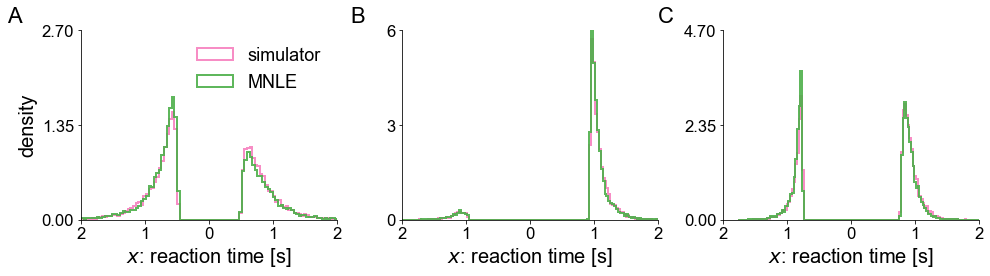

In [5]:
num_examples = 3
show_density = True
fig, ax = plt.subplots(1, num_examples, figsize=(14, 4), sharex=False, sharey=False)
seed = 765789 #torch.randint(1000000, (1,))
torch.manual_seed(seed)
print(f"seed {seed}")
alpha = 0.9

nbins = 150
num_samples = 10000
for i in range(num_examples):
    # Simulate
    tho = prior.sample((1,))
#     tho[0, -1] = 0.2
    xo = simulator(tho.repeat(num_samples, 1))
    rt, cs = mnle.sample(tho, num_samples)
    x_mnle = rt
    x_mnle[cs==0] *= -1
    
    
    # Plotting
    plt.sca(ax if num_examples==1 else ax[i])
    c1, bins, _ = plt.hist(xo.numpy(), bins=nbins, alpha=alpha, label="simulator", 
                           color=colors[3], density=show_density, histtype="step", linewidth=2)
    c2, _, _ = plt.hist(x_mnle.numpy(), bins=bins, alpha=alpha, label="MNLE", 
                        color=colors[2], density=show_density, histtype="step", linewidth=2)

    if i == 0:
        plt.legend()
        plt.ylabel("density")
    
    # fix yticks.
    maxcount = round(max(c1.max(), c2.max()), 1)
    if maxcount % 2: 
        maxcount += 1 
    plt.ylim(0, maxcount)
    plt.yticks(np.linspace(0, maxcount, 3))
    
    # xticks
    plt.xlabel("$x$: reaction time [s]")
    plt.xticks([-2, -1, 0, 1, 2], [2, 1, 0, 1, 2])
    plt.xlim(-2, 2)

y1 = 0.93
x1 = 0.01
dx = 0.34
weight = "regular"
fontsize = 22
fig.text(x1, y1, "A", fontsize=fontsize, fontweight=weight)
fig.text(x1 + dx, y1, "B", fontsize=fontsize, fontweight=weight)
fig.text(x1 + 1.9*dx, y1, "C", fontsize=fontsize, fontweight=weight)

plt.tight_layout();
fig.savefig("figures/FigureA4-MNLE-synthetic-data.png", dpi=300, bbox_inches="tight");